# WeatherPy

In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate cities list

In [62]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=40)
lngs = np.random.uniform(low=-180.000, high=180.000, size=40)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

32

### Perform API calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [63]:
# Create a base url
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + api_key

# Counters
city_counter = 1
set_counter = 1

# Create the lists to hold relative data
cities_list= []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print("Started")

# Create a query url for each city in the cities list to get json response
for i, city in enumerate(cities):
    
    # Group cities as sets of 50s
    if (i % 50 == 0 and i >= 50):
        set_counter += 1
        city_counter = 0
         
    # Create API url for each city
    query_url = base_url +"&q=" + city
    
    # Get json respose for each city
    response = requests.get(query_url).json()
    
    # Print the results 
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
    
    # Increase city counter
    city_counter += 1
    
   # Add the values to the lists
    try:       
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(response["name"])
    except:
        print("City not found. Skipping...")
        pass
        
print("Completed")

Started
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | san ramon
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | chuy
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | le vauclin
Processing Record 10 of Set 1 | yar-sale
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | upernavik
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | coihaique
Processing Record 17 of Set 1 | kegayli
City not found. Skipping...
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | nanakuli
Processing Record 20 of Set 1 | talnakh
Processing Record 21 of Set 1 | sabang
Processing Record 22 of Set 1 | new norfolk
Processing Record 23 of Set 1 | hailar
Processing Record 24 of Set 1 | tu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [65]:
# Create the dictionary to keep data 
weather_data = {
     "City": cities_list,
     "Cloudiness": cloudiness,
     "Country": country,
     "Date": date,
     "Humidity": humidity,
     "Lat": lat,
     "Lng": lng,
     "Max Temp": max_temp,
     "Wind Speed": wind_speed    
 }

# Create the data frame and count variables for each columns
weather_df = pd.DataFrame(weather_data)
weather_df.count()

City          30
Cloudiness    30
Country       30
Date          30
Humidity      30
Lat           30
Lng           30
Max Temp      30
Wind Speed    30
dtype: int64

In [66]:
# Display the data frame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bluff,81,AU,1569779973,60,-23.58,149.07,65.21,2.17
1,Avarua,61,CK,1569779803,73,-21.21,-159.78,71.60,9.17
2,San Ramon,40,NI,1569779973,73,12.92,-85.84,77.00,5.64
3,Albany,1,US,1569779973,67,42.65,-73.75,66.99,5.82
4,Chuy,9,UY,1569779974,74,-33.69,-53.46,65.21,15.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

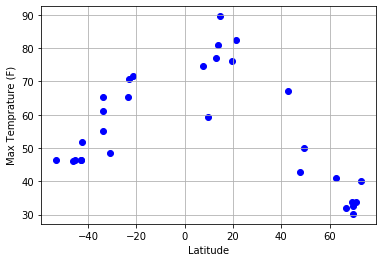

In [67]:
# Create a scatter plot for latitude and temprature
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker = "o", color = "b")
#plt.title('City Latitude vs. Max Temperature ({})'.format(date))
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (F)")
plt.grid()


#### Latitude vs. Humidity Plot

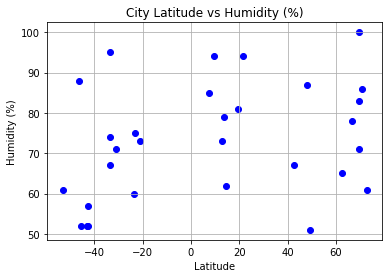

In [68]:
# Create a scatter plot for latitude and humidity
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker = "o", color = "b")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (%)")
plt.grid()


#### Latitude vs. Cloudiness Plot

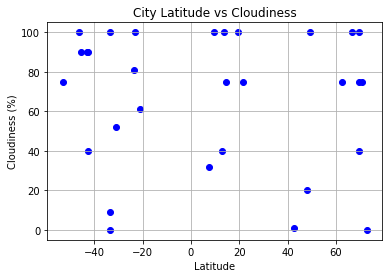

In [69]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker = "o", color = "b")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")
plt.grid()


#### Latitude vs. Wind Speed Plot

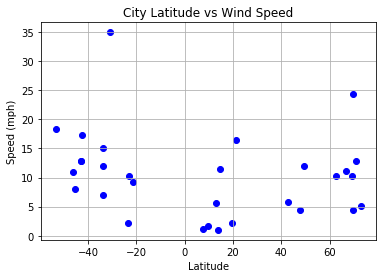

In [70]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker = "o", color = "b")
plt.xlabel("Latitude")
plt.ylabel("Speed (mph)")
plt.title("City Latitude vs Wind Speed")
plt.grid()
